In [24]:
import torch
from matplotlib.pyplot import figure
import numpy as np
from torch import  nn

In [25]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [26]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5, 0.5)])
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle=True)

In [27]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [28]:
inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2

In [29]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

probabilities = softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim = 1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [30]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)

        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

In [31]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [32]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim = 1)

        return x

In [33]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 10))
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)

print(loss)

tensor(2.2841, grad_fn=<NllLossBackward>)


In [34]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), 
                      nn.Linear(128, 64), nn.ReLU(), 
                      nn.Linear(64, 10), nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels)

print(loss)

tensor(2.2961, grad_fn=<NllLossBackward>)


In [35]:
x = torch.randn(2, 2, requires_grad=True)
print(x)

tensor([[ 0.5973,  1.3909],
        [-1.8782, -0.5111]], requires_grad=True)


In [36]:
y = x**2
print(y)

tensor([[0.3567, 1.9346],
        [3.5278, 0.2612]], grad_fn=<PowBackward0>)


In [37]:
print(y.grad_fn)

In [38]:
z = y.mean()

In [39]:
print(x.grad)

None


In [40]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.2986,  0.6954],
        [-0.9391, -0.2555]])
tensor([[ 0.2986,  0.6954],
        [-0.9391, -0.2555]], grad_fn=<DivBackward0>)


In [41]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), 
                      nn.Linear(128, 64), nn.ReLU(), 
                      nn.Linear(64, 10), nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels)

print(loss)

tensor(2.2988, grad_fn=<NllLossBackward>)


In [42]:
print("Before Backward pass : \n", model[0].weight.grad)
loss.backward()
print("After Backward pass : \n",model[0].weight.grad)

Before Backward pass : 
 None
After Backward pass : 
 tensor([[ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        ...,
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


In [43]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [44]:
print('Inital weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Inital weights -  Parameter containing:
tensor([[ 1.9387e-02,  1.0676e-02,  5.9656e-03,  ..., -1.5762e-02,
          6.6692e-03,  2.2570e-02],
        [ 3.3890e-02,  5.0750e-03,  1.0938e-03,  ...,  2.7988e-02,
          2.7544e-02,  3.4650e-02],
        [-2.5923e-02, -2.8438e-02, -2.9675e-02,  ..., -1.7569e-02,
         -6.7470e-03, -3.5486e-02],
        ...,
        [-1.0701e-02,  2.3796e-02, -1.0535e-02,  ..., -2.5587e-02,
         -7.8063e-03, -2.8431e-05],
        [-1.4640e-02, -2.4052e-02,  1.9437e-02,  ..., -2.2568e-02,
          3.8320e-03,  2.2114e-02],
        [ 1.3573e-02,  1.7200e-03,  3.2379e-02,  ...,  1.6092e-02,
          2.1467e-02, -1.0497e-03]], requires_grad=True)
Gradient - tensor([[-1.9258e-04, -1.9258e-04, -1.9258e-04,  ..., -1.9258e-04,
         -1.9258e-04, -1.9258e-04],
        [ 4.2689e-05,  4.2689e-05,  4.2689e-05,  ...,  4.2689e-05,
          4.2689e-05,  4.2689e-05],
        [-1.2110e-03, -1.2110e-03, -1.2110e-03,  ..., -1.2110e-03,
         -1.2110e-03, -1

In [45]:
optimizer.step()
print('Updated weights -', model[0].weight)

Updated weights - Parameter containing:
tensor([[ 1.9389e-02,  1.0678e-02,  5.9675e-03,  ..., -1.5760e-02,
          6.6711e-03,  2.2572e-02],
        [ 3.3890e-02,  5.0745e-03,  1.0934e-03,  ...,  2.7988e-02,
          2.7543e-02,  3.4650e-02],
        [-2.5911e-02, -2.8426e-02, -2.9663e-02,  ..., -1.7557e-02,
         -6.7348e-03, -3.5474e-02],
        ...,
        [-1.0653e-02,  2.3844e-02, -1.0488e-02,  ..., -2.5539e-02,
         -7.7587e-03,  1.9155e-05],
        [-1.4640e-02, -2.4052e-02,  1.9437e-02,  ..., -2.2568e-02,
          3.8320e-03,  2.2114e-02],
        [ 1.3565e-02,  1.7119e-03,  3.2371e-02,  ...,  1.6084e-02,
          2.1459e-02, -1.0579e-03]], requires_grad=True)


In [46]:
model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(),
                      nn.Linear(128, 64), nn.ReLU(), 
                      nn.Linear(64, 10), nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")    

Training loss: 1.8825670020666712
Training loss: 0.8393916977938812
Training loss: 0.5305155003979516
Training loss: 0.431023176370272
Training loss: 0.3852083096975711


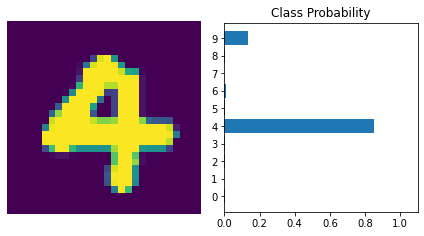

In [55]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)